**Folder-Wise Accuracy Visualization**

In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

#Read The file
df = pd.read_csv('Wine.csv')

#Find null values 
df.isna().sum()

#Data Spliting
x = df.drop("Customer_Segment",axis=1)
y = df["Customer_Segment"]

#Create Pipline 
pipeline = Pipeline([("Scaler",StandardScaler()),("model",LogisticRegression(max_iter=1000))])

#Apply K-Fold CV
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(pipeline,x,y,cv=skf,scoring="accuracy")

print("Cross Validation Score:",scores)
print("Avarage score:",scores.mean())


Cross Validation Score: [0.97222222 0.97222222 0.97222222 1.         1.        ]
Avarage score: 0.9833333333333332


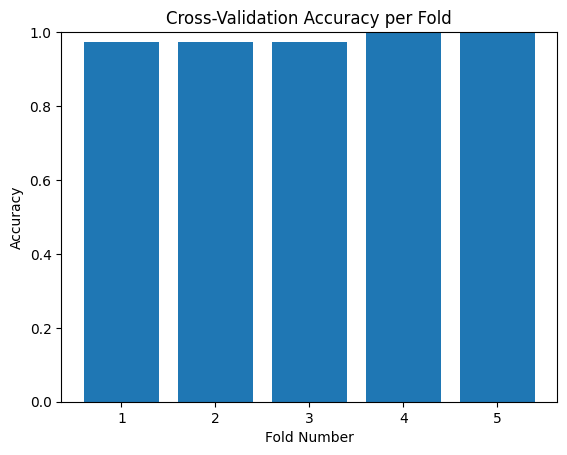

In [34]:
# visualization
plt.bar(range(1,6),scores)
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy per Fold")
plt.ylim(0,1)
plt.show()


**Train-Test vs Cross-Validation**

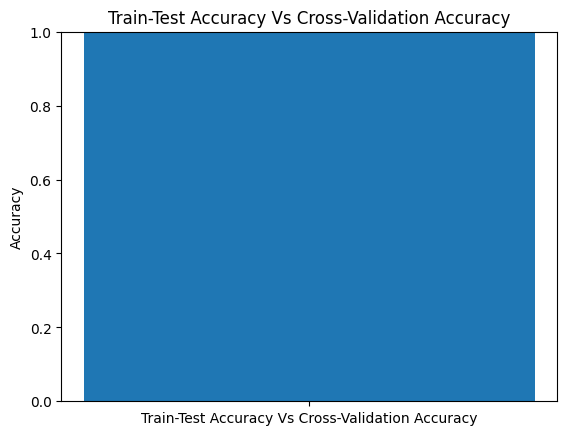

Train-Test Accuracy: 1.0
Cross-Validation Avg Accuracy: 0.9833333333333332


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Train-test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
test_accuracy = accuracy_score(y_test,y_pred)

#Plot Comparision
plt.bar(["Train-Test Accuracy Vs Cross-Validation Accuracy"],[test_accuracy,scores.mean()])
plt.ylabel("Accuracy")
plt.title("Train-Test Accuracy Vs Cross-Validation Accuracy")
plt.ylim(0,1)
plt.show()

print("Train-Test Accuracy:",test_accuracy)
print("Cross-Validation Avg Accuracy:",scores.mean())